In [1]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns

plt. rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

## K Means Clustering

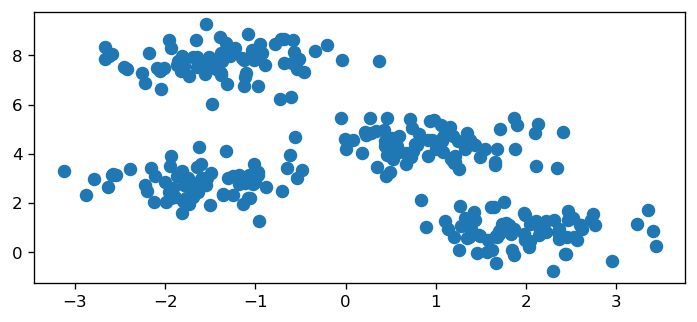

In [3]:
from sklearn.datasets import make_blobs # tạo dữ liệu giả lập

X, y_true = make_blobs(n_samples=300 # số lượng điểm dữ liệu được tạo ra
                       , centers=4 # số lượng cluster hoặc nhóm dữ liệu cần tạo
                       , cluster_std=0.60 # độ lệch chuẩn của các cluster, tức là độ phân tán
                       , random_state=0
                      )

# một tuple gồm hai phần tử: X là một mảng hai chiều chứa các điểm dữ liệu, y_true là một mảng 1 chiều chứa label của các dữ liệu đó
plt.scatter(X[:, 0], X[:, 1], s=50);
# kết quả scatter plot hiển thị vị trí của các điểm dữ liệu X:0, X:1 lần lượt là tọa độ x và y. s=50 là kich thước các điểm.

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4) # phân cụm kmeans với thanm số n_clusters = 4, phân cụm dữ liệu trong X thành 4 cụm
kmeans.fit(X)
y_preds = kmeans.predict(X)

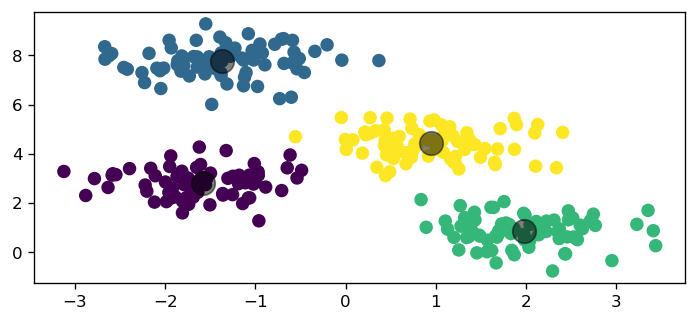

In [5]:
# vẽ biểu đồ kết quả của thuật toán phân cụm kmeans
# vẽ các điểm dữ liệu trên mặt phẳng 2 chiều, với trục x là giá trị của cột đầu tiên trong ma trận dữ liệu X
# trục y là ma trận của cột thứ 2 trong ma trận dữ liệu X

# các điểm dữ liệu được tô màu bằng cách gán giá trị từ y_preds
plt.scatter(X[:, 0], X[:, 1], c=y_preds, s=50, cmap='viridis')

# lấy ra tọa độ của các trung tâm cụm được tính toán bởi thuật toán KMeans
centers = kmeans.cluster_centers_

# vẽ cá trung tâm cụm trên mặt phẳng với màu đen và kích thước 200
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Như vậy là chúng ta đã phân cụm xong với số cụm là 4. Đương nhiên chúng ta được kết quả đẹp như vậy là do máy đã tự động tạo ra dữ liệu để t dễ thực hành.

### Thực tế, để chọn ra cơ số K phù hợp, chúng ta sẽ tiến hành 2 test là elbow và sihouette coefficent

In [6]:
# tìm kiếm giá trị tối ưu cho tham số của mô hình, như số lượng clusters, giá trị của epsilon trong thuật toán DBSCAN

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=101)

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
kmeans = KMeans(init="random" #Sd ngẫu nhiên khởi tạo các centers
                ,n_clusters=3 #lg ploai
                ,n_init=10 #chạy KMeans 10 lần với các centers khác nhau và chọn ra kết quả tốt nhất
                ,max_iter=300 #số lần lặp tối đa để hội tụ của KMeans
                ,random_state=101 #seed cho việc tạo ngẫu nhiên các centers
                )

In [14]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=101)

In [15]:
#trả về một mảng numpy chứa tọa độ của các trung tâm cụm tìm được bởi thuật toán KMeans
kmeans.cluster_centers_

array([[ 0.29214089,  0.12755446],
       [ 0.9260244 ,  1.04322151],
       [-1.21380498, -1.16887218]])

In [16]:
#trả về số lần lặp tối đa được thực hiện trong quá trình huấn luyện KMeans để đạt được tình trạng hội tụ (convergence)
# Giá trị này được sử dụng để xác định liệu thuật toán có hội tụ hay không.
kmeans.n_iter_

10

In [17]:
#dự đoán các nhóm/cluster mà các điểm dữ liệu
y_kmeans = kmeans.predict(scaled_features)

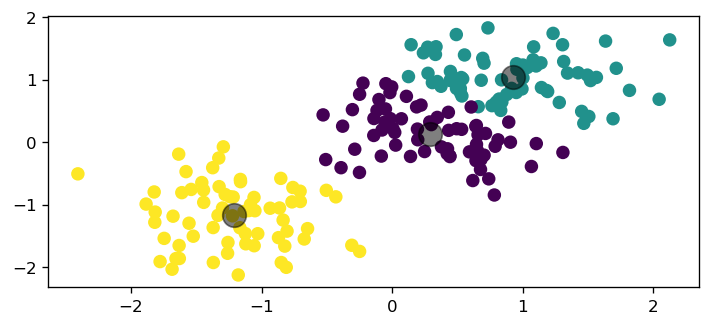

In [18]:
#vẽ biểu đồ phân cụm dữ liệu bằng KMeans
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Example 2

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt. rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

In [20]:
link='https://drive.google.com/file/d/1qN48XVbwhFJwRBSDZ1vVAxhAGBFOdNEE/view?usp=sharing'
# Nguồn data https://raw.githubusercontent.com/srafay/Machine_Learning_A-Z/master/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [21]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df['Genre'] = df['Genre'].replace(['Male', 'Female'], [1, 0])

In [23]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [24]:
df.drop(columns = ['CustomerID'], inplace=True)

In [25]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [27]:
X = df.iloc[:].values

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [31]:
##1. Dùng elbow với giá trị SSE
kmeans_kwargs = {
                    "init": "random",
                    "n_init": 10,
                    "max_iter": 300,
                    "random_state": 42,
                }

# A list holds the SSE values for each k
sse = [] #Tính toán giá trị SSE cho mỗi giá trị của k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

C:\Users\Jason Quach\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


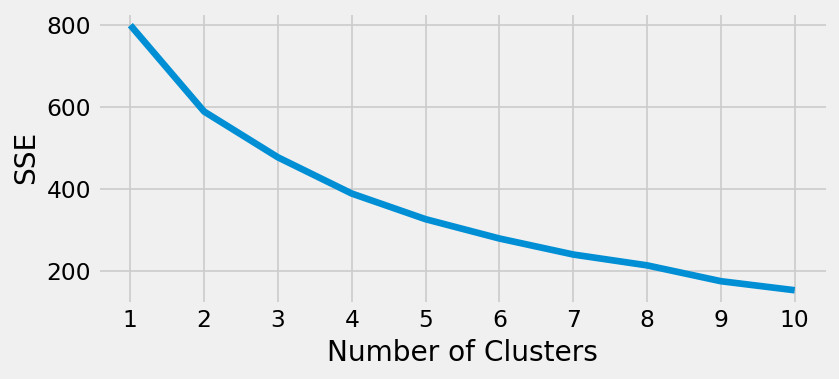

In [32]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()